# NIVEL 1
### Exercici 1
Mostra totes les transaccions realitzades per empreses d'Alemanya.

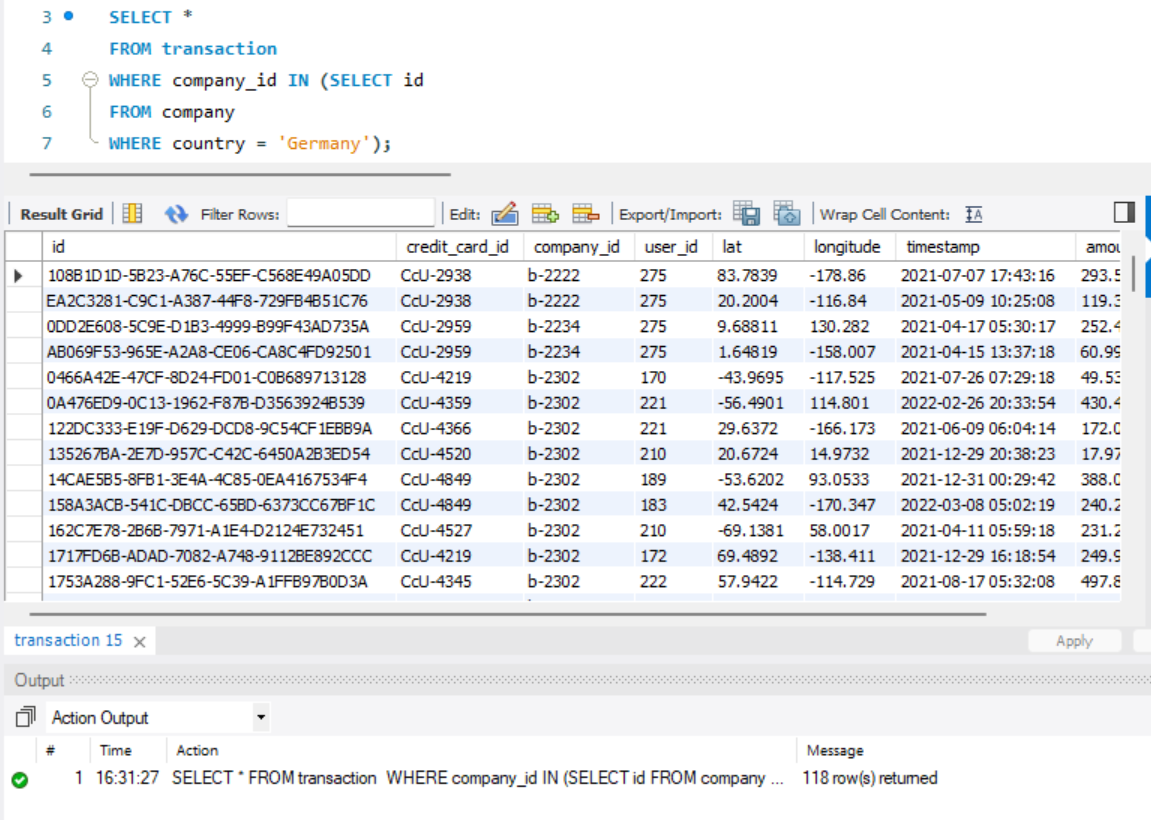

### Exercici 2
Màrqueting està preparant alguns informes de tancaments de gestió, et demanen que els passis un llistat de les empreses que han realitzat transaccions per una suma superior a la mitjana de totes les transaccions.


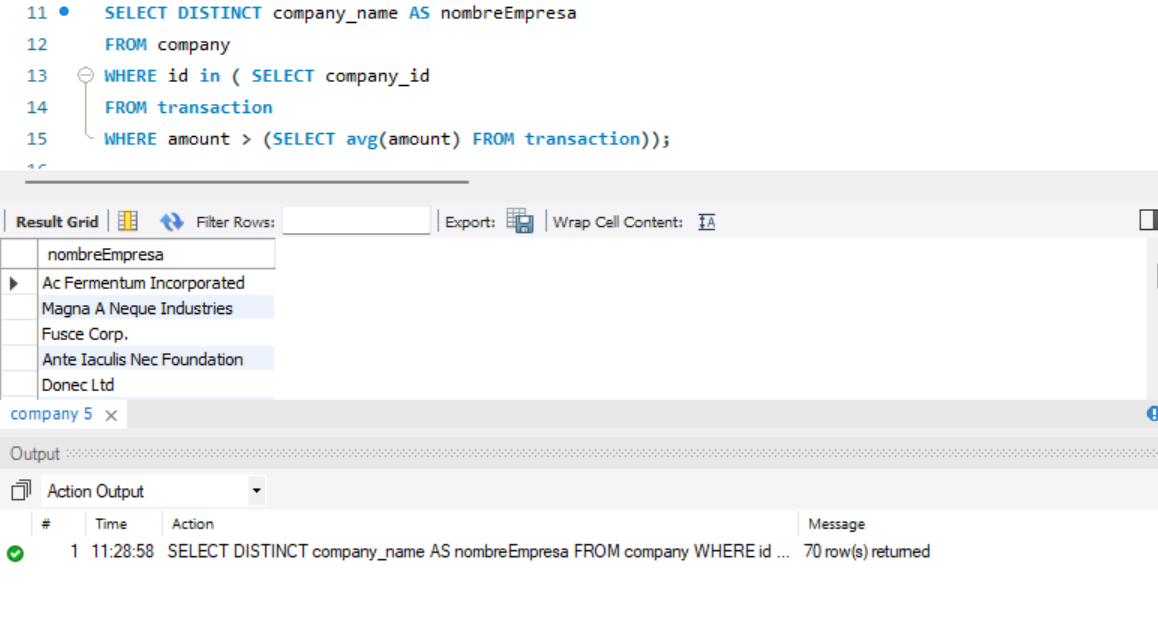



Aquí tenía la duda si utilizar la logica que habia aplicado en el sprint nº 1 (filtrar por declined = 0) he decidido no hacerlo ya que por como está estructurada la pregunta se puede interpretar  que se pide un listado de TODAS las transacciones, no solo las aceptadas.

### Exercici 3
El departament de comptabilitat va perdre la informació de les transaccions realitzades per una empresa, però no recorden el seu nom, només recorden que el seu nom iniciava amb la lletra c. Com els pots ajudar? Comenta-ho acompanyant-ho de la informació de les transaccions.

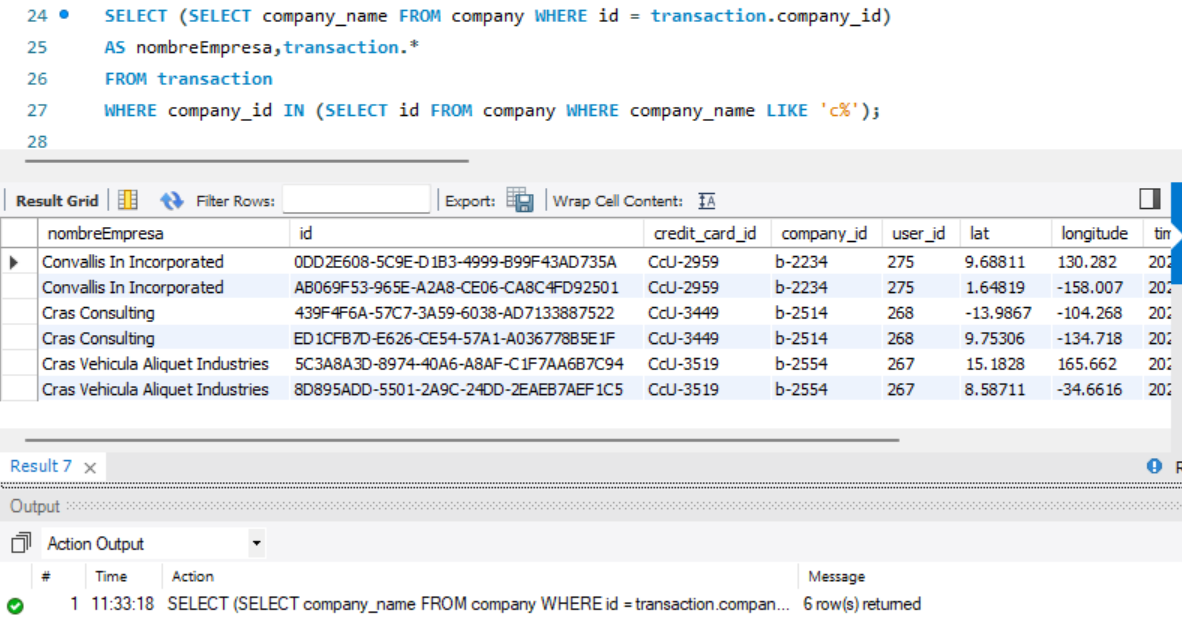

### Exercici 4
Van eliminar del sistema les empreses que no tenen transaccions registrades, lliura el llistat d'aquestes empreses.




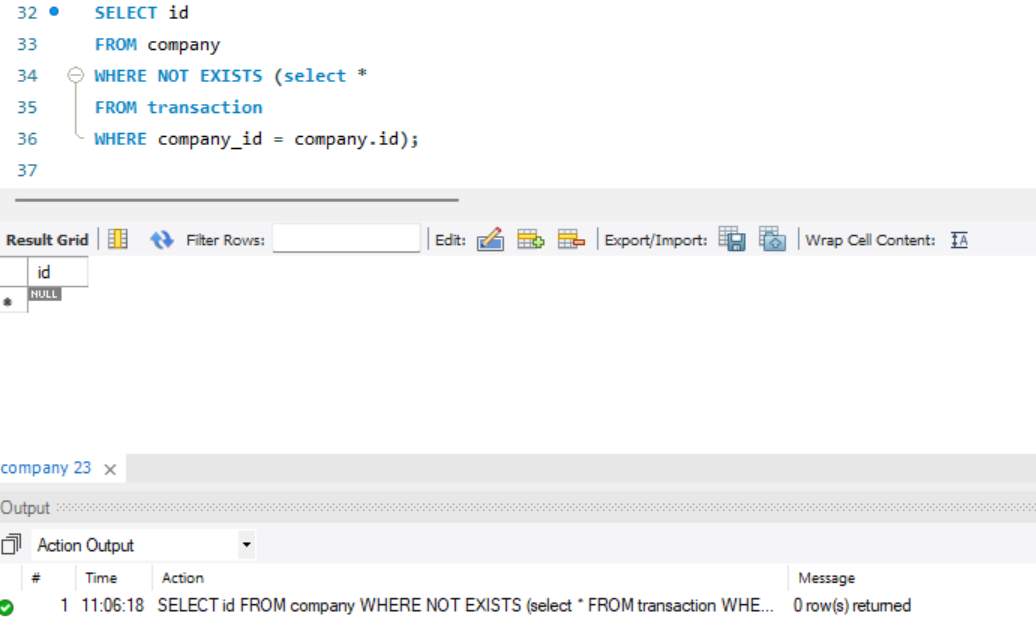


# NIVEL 2

### Exercici 1
En la teva empresa, es planteja un nou projecte per a llançar algunes campanyes publicitàries per a fer competència a la companyia Non Institute. Per a això, et demanen la llista de totes les transaccions realitzades per empreses que estan situades en el mateix país que aquesta companyia.

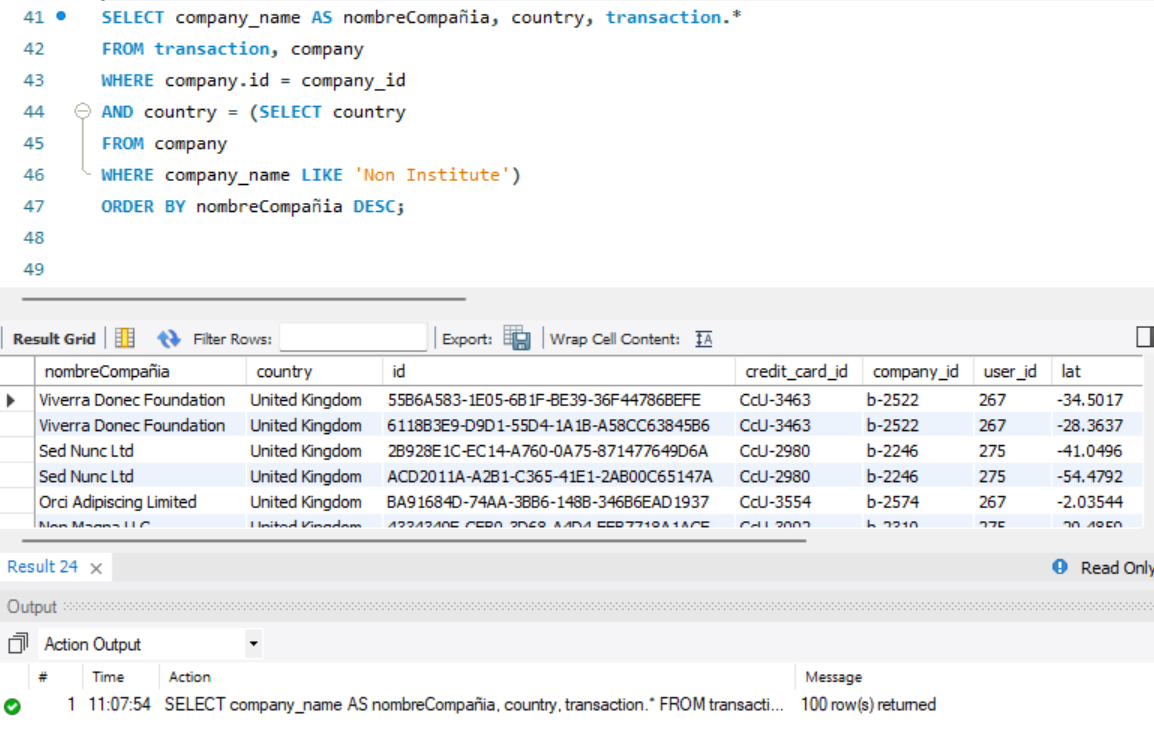


Aquí decidí ordenar el resultado por el nombre de cada compañía, así al explorar los datos es mas facil de ver las compañías que hacen más transacciones.


### Exercici 2
El departament de comptabilitat necessita que trobis l'empresa que ha realitzat la transacció de major suma en la base de dades.

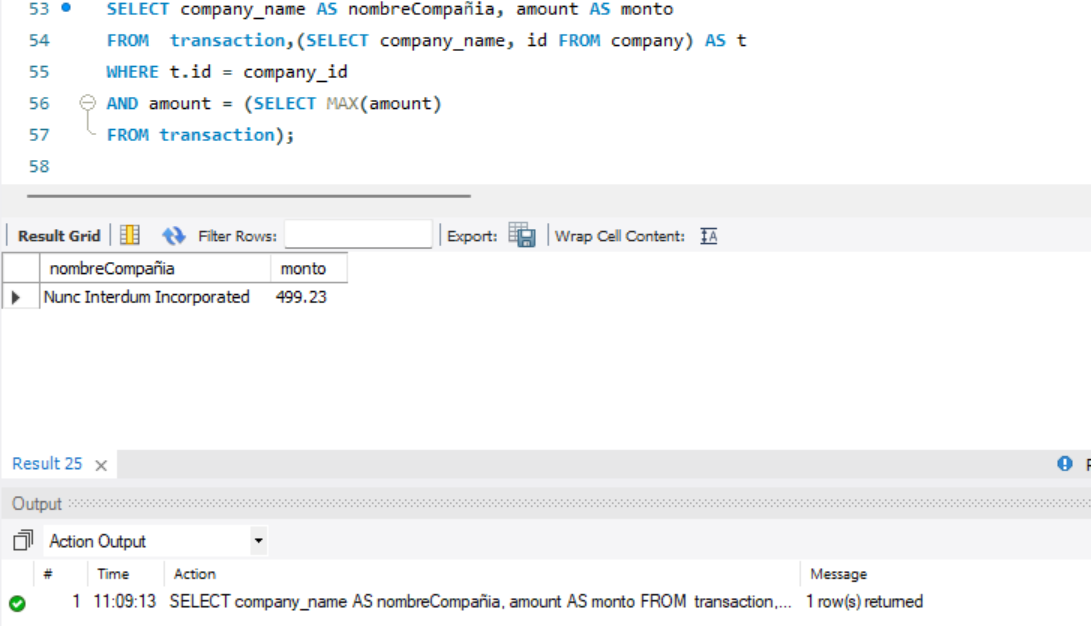


# NIVEL 3

### Exercici 1
S'estan establint els objectius de l'empresa per al següent trimestre, per la qual cosa necessiten una base sòlida per a avaluar el rendiment i mesurar l'èxit en els diferents mercats. Per a això, necessiten el llistat dels països la mitjana de transaccions dels quals sigui superior a la mitjana general.

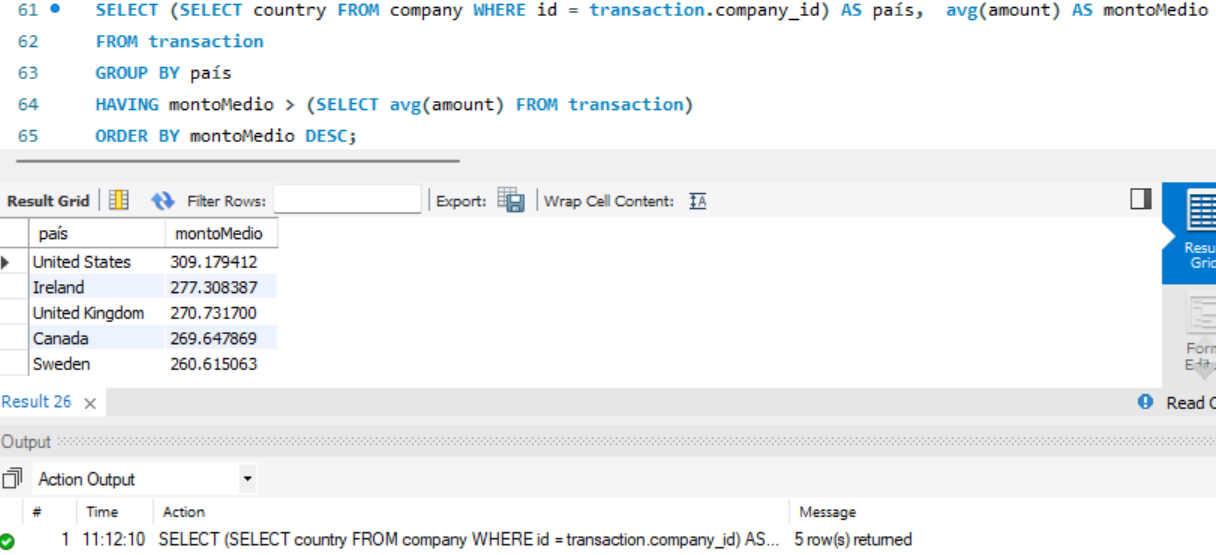

### Exercici 2
Necessitem optimitzar l'assignació dels recursos i dependrà de la capacitat operativa que es requereixi, per la qual cosa et demanen la informació sobre la quantitat de transaccions que realitzen les empreses, però el departament de recursos humans és exigent i vol un llistat de les empreses on especifiquis si tenen més de 4 transaccions o menys.

Aqui he probado dos metodos : el de CASE y el de IF

### Opción metodo CASE 


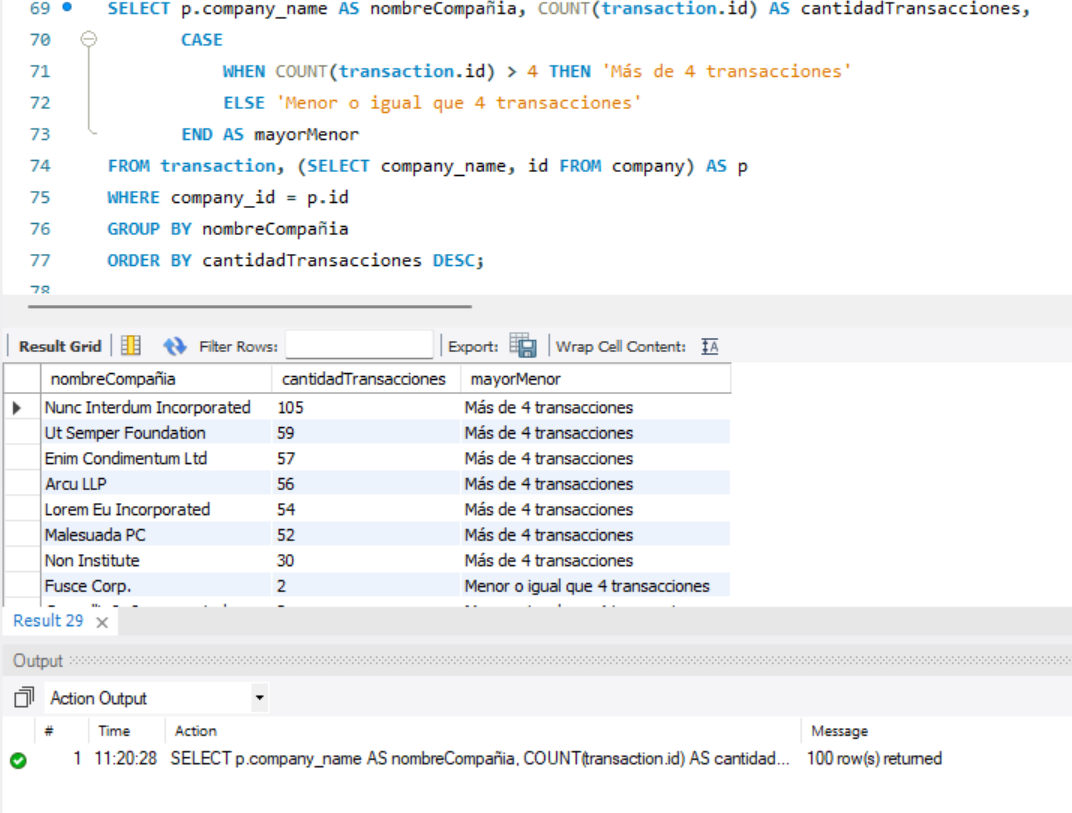

### Opción metodo IF

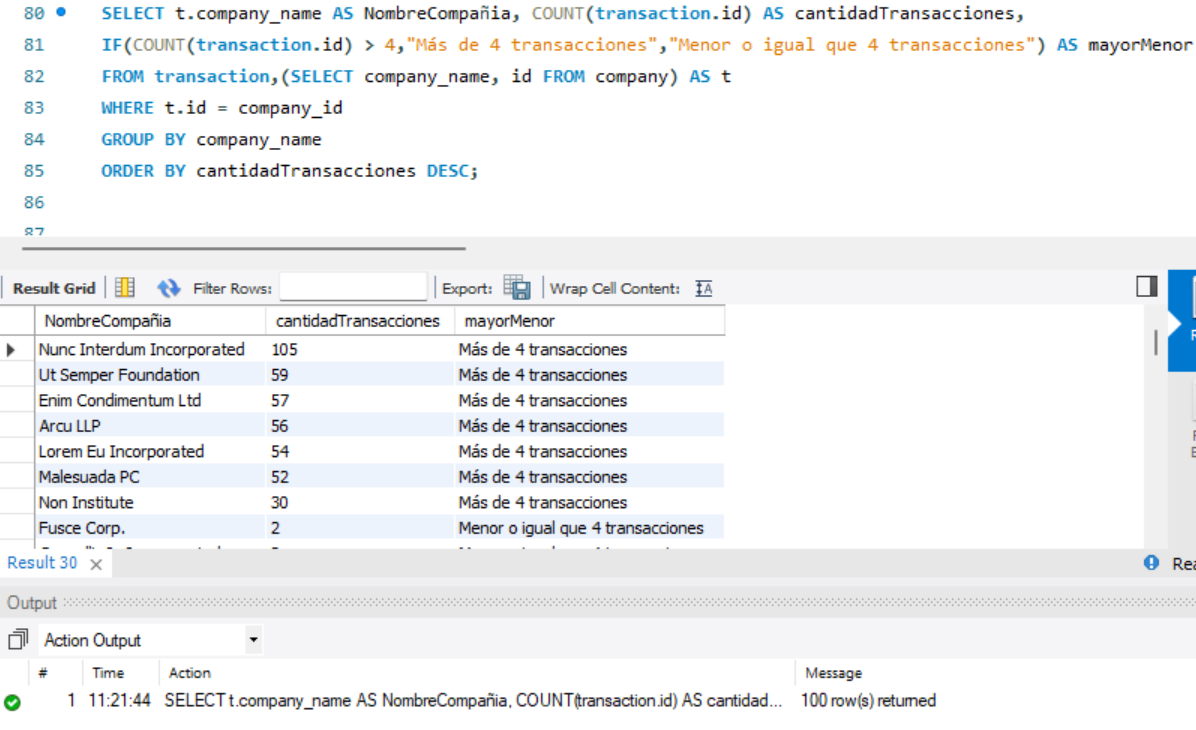

como se puede observar, el resultado utilizando ambos metodos es el mismo, existe una diferencia a nivel de velocidad de ejecución, pero al ser una base de datos tan pequeña y al ser una consulta poco compleja, esta diferencia se vuelve imperceptible e irrelevante

```

```
-- Ejercicio 1
SELECT *
FROM transaction 
WHERE company_id IN (SELECT id
FROM company
WHERE country = 'Germany');

-- Ejercicio 2

SELECT DISTINCT company_name AS nombreEmpresa
FROM company
WHERE id in ( SELECT company_id
FROM transaction 
WHERE amount > (SELECT avg(amount) FROM transaction));



-- Ejercicio 3
SELECT (SELECT company_name FROM company WHERE id = transaction.company_id) 
AS nombreEmpresa,transaction.*
FROM transaction
WHERE company_id IN (SELECT id FROM company WHERE company_name LIKE 'c%');






-- Ejerecicio 4


SELECT id
FROM company
WHERE NOT EXISTS (select *
FROM transaction
WHERE company_id = company.id);

-- Ejercicio 1 nivel 2


SELECT company_name AS nombreCompañia, country, transaction.*
FROM transaction, company
WHERE company.id = company_id
AND country = (SELECT country
FROM company
WHERE company_name LIKE 'Non Institute')
ORDER BY nombreCompañia DESC;


-- Ejercicio 2 nivel 2

 
SELECT company_name AS nombreCompañia, amount AS monto
FROM  transaction,(SELECT company_name, id FROM company) AS t
WHERE t.id = company_id
AND amount = (SELECT MAX(amount)
FROM transaction);
 
 -- Ejercicio 1 nivel 3
 
SELECT (SELECT country FROM company WHERE id = transaction.company_id) AS país,  avg(amount) AS montoMedio
FROM transaction
GROUP BY país
HAVING montoMedio > (SELECT avg(amount) FROM transaction)
ORDER BY montoMedio DESC;

-- Ejercicio 2 nivel 3
-- Opción con CASE clause
SELECT p.company_name AS nombreCompañia, COUNT(transaction.id) AS cantidadTransacciones,
       CASE 
           WHEN COUNT(transaction.id) > 4 THEN 'Más de 4 transacciones'
           ELSE 'Menor o igual que 4 transacciones'
       END AS mayorMenor
FROM transaction, (SELECT company_name, id FROM company) AS p
WHERE company_id = p.id
GROUP BY nombreCompañia
ORDER BY cantidadTransacciones DESC;

-- Opción metodo IF
SELECT t.company_name AS NombreCompañia, COUNT(transaction.id) AS cantidadTransacciones,
IF(COUNT(transaction.id) > 4,"Más de 4 transacciones","Menor o igual que 4 transacciones") AS mayorMenor
FROM transaction,(SELECT company_name, id FROM company) AS t
WHERE t.id = company_id
GROUP BY company_name
ORDER BY cantidadTransacciones DESC;



```